<img src="files/images.png">

In this project using recurrent neural network,Google opening stock price for month January(2017) is predicted. Last 5 year's data of Google stock price is used for analysis.

About RNN
Classic RNNs have short memory, and were neither popular nor powerful for this exact reason. But a recent major improvement in Recurrent Neural Networks gave rise to the popularity of LSTMs (Long Short Term Memory RNNs) which has completely changed the playing field.

Predicted stock price for Google's trending Stock data

Successfully predicted Google stock price by using last 5 year's data of Google stock price.
Use of RNN(LSTM) was implemented alongside with Keras framework producing some good results.
Technology Used: Deep Learning , RNN , Machine Learning , LSTM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## importing the datasets

In [3]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

## Feature Scaling

### The two best ways of applying Feature Scaling is Standardisation and Normalisation

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [5]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [6]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2

### Building and Training the RNN

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


Using TensorFlow backend.


## Intializing the Regressor

In [8]:
regressor = Sequential()

### Adding the first LSTM layer and dropout regulation

In [9]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding the second LSTM layer and dropout regulation

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding the third LSTM layer and dropout regularization

In [12]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding the fourth LSTM layer and dropout regularization

In [13]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the outputs

In [14]:
regressor.add(Dense(units = 1))

#### Compiling the RNN

In [16]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [17]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 30s 25ms/step - loss: 0.0317
Epoch 2/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0065
Epoch 3/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0052
Epoch 4/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0054
Epoch 5/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0053
Epoch 6/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0050
Epoch 7/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0051
Epoch 8/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0047
Epoch 9/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0046
Epoch 10/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0042
Epoch 11/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0044
Epoch 12/100
1198/1198 [============================

1198/1198 [==============================] - 19s 16ms/step - loss: 0.0015
Epoch 96/100
1198/1198 [==============================] - 20s 16ms/step - loss: 0.0013
Epoch 97/100
1198/1198 [==============================] - 20s 16ms/step - loss: 0.0014
Epoch 98/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0014
Epoch 99/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0014
Epoch 100/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0016


## Making the predictions and visualising the results

### Getting the real stock price of 2017

In [18]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [19]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

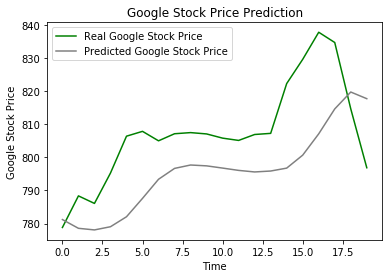

In [21]:
plt.plot(real_stock_price, color = 'green', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'grey', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()